In [154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline
import datetime
from datetime import date
import statsmodels.api as sm
import scipy as sp
import statsmodels.tsa.stattools as ts
from sklearn.linear_model import LinearRegression

In [92]:
df = pd.read_csv('Constant_Maturity_ED _6_.csv', index_col= 'Date')
term = np.arange(0.25, 5.25, 0.25)
df.columns = term

# Construct Samples

In [93]:
SampleA = df.loc['1/3/2011':'1/2/2014']
SampleB = df.loc['1/2/2014': '1/4/2016']
SampleC = df.loc['1/4/2016': '1/3/2017']

In [94]:
SampleA

,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00
Date,,,,,,,,,,,,,,,,,,,,
1/3/2011,0.379928,0.455735,0.569463,0.747582,0.969288,1.238364,1.515791,1.802466,2.079458,2.366150,2.632994,2.900000,3.127519,3.355027,3.572753,3.786207,3.965677,4.129543,4.278931,4.417864
1/4/2011,0.385535,0.479872,0.607393,0.795567,1.022146,1.285377,1.542314,1.804321,2.061823,2.333916,2.595896,2.857710,3.085000,3.317455,3.540056,3.758269,3.942227,4.115680,4.274965,4.419270
1/5/2011,0.401072,0.533702,0.698923,0.927132,1.187811,1.475238,1.751390,2.022436,2.279625,2.546536,2.798476,3.050256,3.272464,3.500000,3.722519,3.940524,4.124168,4.297549,4.456642,4.600807
1/6/2011,0.426668,0.546482,0.693756,0.908719,1.165867,1.453201,1.723684,1.984578,2.231753,2.483468,2.720900,2.967726,3.184872,3.412521,3.635000,3.852765,4.036112,4.209415,4.368317,4.512342
1/7/2011,0.427912,0.520908,0.635748,0.817098,1.045532,1.309494,1.571113,1.826886,2.069326,2.321372,2.563935,2.815501,3.037480,3.270150,3.497535,3.720000,3.908001,4.086169,4.249826,4.398657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/26/2013,0.288084,0.327815,0.378353,0.454054,0.564273,0.713807,0.912534,1.170000,1.471491,1.783480,2.059415,2.348185,2.644641,2.896244,3.128675,3.359235,3.557030,3.741585,3.908760,4.062523
12/27/2013,0.278639,0.318123,0.363449,0.429615,0.535635,0.685741,0.885057,1.143180,1.450000,1.766662,2.051680,2.345960,2.647614,2.898633,3.135677,3.366827,3.564043,3.748589,3.915502,4.069235
12/30/2013,0.279704,0.319627,0.364882,0.427024,0.529343,0.670784,0.862311,1.117565,1.420528,1.731555,2.011439,2.301414,2.601882,2.856146,3.093756,3.323760,3.524490,3.713811,3.885123,4.039978


In [95]:
SampleB

,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00
Date,,,,,,,,,,,,,,,,,,,,
1/2/2014,0.281696,0.320617,0.367452,0.440821,0.548525,0.691301,0.884552,1.136637,1.435705,1.741206,2.020685,2.311506,2.611196,2.863962,3.106151,3.340730,3.540991,3.729668,3.904732,4.064600
1/3/2014,0.272378,0.317425,0.374570,0.458127,0.576154,0.729088,0.926893,1.174231,1.468788,1.769125,2.043907,2.329961,2.629303,2.881645,3.123841,3.358161,3.558103,3.746711,3.921584,4.081307
1/6/2014,0.273371,0.319349,0.376142,0.456062,0.575988,0.729014,0.917874,1.157162,1.443207,1.738206,2.007997,2.290000,2.583201,2.829774,3.067012,3.300382,3.499450,3.687823,3.862130,4.021417
1/7/2014,0.272070,0.314716,0.371906,0.452175,0.572484,0.726012,0.914801,1.149386,1.430986,1.720640,1.985994,2.268224,2.550679,2.797356,3.034753,3.262901,3.461521,3.649872,3.823967,3.983135
1/8/2014,0.276252,0.325968,0.389949,0.486148,0.622076,0.796637,1.011656,1.276118,1.575494,1.869311,2.138952,2.416397,2.698263,2.935000,3.162476,3.380545,3.564174,3.737474,3.901219,4.055032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/28/2015,0.749866,0.901201,1.048386,1.206794,1.360990,1.488643,1.612216,1.731525,1.821281,1.905511,1.984438,2.069226,2.130073,2.188992,2.248298,2.308305,2.358287,2.412256,2.462425,2.514845
12/29/2015,0.773780,0.933378,1.085319,1.253834,1.418469,1.555000,1.683558,1.807580,1.902025,1.991294,2.070398,2.155053,2.215689,2.274660,2.333966,2.393925,2.443838,2.497859,2.547964,2.600504
12/30/2015,0.770833,0.929978,1.082145,1.250631,1.409801,1.546452,1.675000,1.793827,1.888002,1.977201,2.056464,2.135967,2.200822,2.265147,2.324689,2.384525,2.434395,2.488459,2.538503,2.591164


In [96]:
SampleC

,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,3.75,4.00,4.25,4.50,4.75,5.00
Date,,,,,,,,,,,,,,,,,,,,
1/4/2016,0.759460,0.912387,1.060686,1.224507,1.377143,1.508393,1.631738,1.744426,1.832846,1.916724,1.990870,2.070000,2.129338,2.193600,2.253010,2.312588,2.362178,2.416452,2.466203,2.519511
1/5/2016,0.749069,0.899119,1.047018,1.206123,1.358396,1.484299,1.602948,1.715552,1.803789,1.887583,1.961743,2.040768,2.100000,2.164310,2.223606,2.288079,2.337804,2.391916,2.446334,2.504969
1/6/2016,0.733769,0.866520,0.997166,1.146776,1.288465,1.410576,1.529147,1.636059,1.714263,1.793410,1.867522,1.941462,2.000676,2.065000,2.124310,2.188656,2.243239,2.297577,2.351919,2.410737
1/7/2016,0.714025,0.830489,0.952451,1.092533,1.229119,1.346353,1.460201,1.567293,1.650540,1.734340,1.808447,1.887407,1.951388,2.015707,2.080000,2.149311,2.203789,2.262975,2.322392,2.381635
1/8/2016,0.731027,0.838629,0.947394,1.077320,1.197351,1.301311,1.405801,1.507932,1.586036,1.664994,1.739537,1.823324,1.887058,1.951417,2.015764,2.085000,2.139392,2.198659,2.257999,2.321895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12/27/2016,1.093993,1.256942,1.420944,1.598467,1.731437,1.865000,1.988533,2.122428,2.216994,2.311127,2.390420,2.475197,2.531066,2.585377,2.634586,2.693879,2.739896,2.783999,2.828462,2.876644
12/28/2016,1.085448,1.243382,1.402757,1.574911,1.697700,1.826370,1.945000,2.073764,2.163167,2.247396,2.321416,2.405948,2.461804,2.511291,2.559854,2.624168,2.670458,2.714470,2.758977,2.807205
12/29/2016,1.072124,1.224530,1.374059,1.536316,1.659127,1.787655,1.901379,2.030000,2.119087,2.203249,2.277398,2.356956,2.412125,2.466613,2.515536,2.579876,2.625657,2.674542,2.719679,2.767430


In [97]:
def CCA_BT(dataset):
    
    X=dataset.iloc[:-1]#.as_matrix()
    Y=dataset.iloc[1:]#.as_matrix()

    A=np.linalg.lstsq(X,Y)[0]
    cov=Y.cov()
    M=np.linalg.inv(cov).dot(A.T.dot(cov.dot(A)))
    xcv_COINT,vcv_COINT=np.linalg.eig(M)
    return xcv_COINT,vcv_COINT

def half_life(x,dt=1./260):
    x = list(x)
    X=sm.add_constant(x[:-1])
    Y=x[1:]
    res = sm.OLS(Y,X).fit()
    R = res.params[1]
    half_life = np.log(0.5)/np.log(R)*dt
    return half_life

#compute the weight and the cointegrated vector
def coint_vec(dataset):
    val, _ =CCA_BT(dataset)
    w = [1.,-val[1]/val[0]]
    res_vect = dataset.dot(w)
    return w,res_vect

def AR_model(coint_vec):
    ar_model = AR(coint_vec.as_matrix())
    ar_res = ar_model.fit(maxlag = 1)
    return ar_res

def optimize_alpha(coint_vec):
    return sp.optimize.fsolve(lambda a:half_life(coint_vec-coint_vec.ewm(span=a).mean())-10./260.,15)[0]
    
def simple_AR(coint_data):
    res = {}
    w,res_vect = coint_vec(coint_data) 
    
    ar_res_coint = AR_model(res_vect)
    alpha = optimize_alpha(res_vect)
    EMA_coint_data = res_vect-res_vect.ewm(span=alpha).mean()
    ar_res_EMA = AR_model(EMA_coint_data)
    return w,alpha,res_vect,EMA_coint_data,ar_res_coint,ar_res_EMA

def print_AR_HL(res):
    w,alpha,res_vect,EMA_coint_data,ar_res_coint,ar_res_EMA = res
    print("weight for the coint vector",w)
    print("AR parameter for cointegrated vector:",ar_res_coint.params)
    print("AR parameter for EMA:",ar_res_EMA.params)
    print("alpha:",2./(alpha+1))
    print("half life for coint vec:",half_life(res_vect))
    print("half life for coint vec-EMA(alpha)",half_life(res_vect-res_vect.ewm(span=alpha).mean()),"\n")
    pass

# Construct signals

In [98]:
coint_time = [[2.0,3.0],[3.0,4.0],[4.0,5.0],[2.0,4.0],[3.0,5.0]]

In [99]:
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.stattools import adfuller
result_AR=[]
for time in coint_time:
    result_AR.append(simple_AR(SampleA[time]));
     
for time,tmp in zip(coint_time,result_AR):
    print(time)
    print_AR_HL(tmp)

[2.0, 3.0]
weight for the coint vector [1.0, -1.0192536526301625]
AR parameter for cointegrated vector: [-0.00258816  0.99647124]
AR parameter for EMA: [-1.52660948e-04  9.33032992e-01]
alpha: 0.06458104604168934
half life for coint vec: 0.7541587940799434
half life for coint vec-EMA(alpha) 0.03846153846153846 

[3.0, 4.0]
weight for the coint vector [1.0, -1.0249084073264507]
AR parameter for cointegrated vector: [-0.00394864  0.9952961 ]
AR parameter for EMA: [-1.88545450e-04  9.33032992e-01]
alpha: 0.053737876077200764
half life for coint vec: 0.5654189165191216
half life for coint vec-EMA(alpha) 0.03846153846153846 

[4.0, 5.0]
weight for the coint vector [1.0, -1.0333745268065442]
AR parameter for cointegrated vector: [-0.00972304  0.98698686]
AR parameter for EMA: [-9.24064992e-05  9.33032992e-01]
alpha: 0.05100827251023899
half life for coint vec: 0.20353015322536164
half life for coint vec-EMA(alpha) 0.038461538461538394 

[2.0, 4.0]
weight for the coint vector [1.0, -1.0208681

/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must 

In [101]:
result_AR_cross=[]
for time in coint_time:
    result_AR_cross.append(simple_AR(SampleB[time]));
     
for time,tmp in zip(coint_time,result_AR_cross):
    print(time)
    print_AR_HL(tmp)
    

[2.0, 3.0]
weight for the coint vector [1.0, -1.0667736633877087]
AR parameter for cointegrated vector: [-0.00698059  0.98935078]
AR parameter for EMA: [0.00699896 0.93303299]
alpha: 0.011433834931818434
half life for coint vec: 0.2490069830320898
half life for coint vec-EMA(alpha) 0.03846153846153846 

[3.0, 4.0]
weight for the coint vector [1.0, -1.1071663694595122]
AR parameter for cointegrated vector: [-0.00978885  0.98438788]
AR parameter for EMA: [0.00590163 0.93303299]
alpha: 0.013796102166664187
half life for coint vec: 0.16942516985854236
half life for coint vec-EMA(alpha) 0.03846153846153892 

[4.0, 5.0]
weight for the coint vector [1.0, -0.13894461163107355]
AR parameter for cointegrated vector: [0.13960598 0.93790098]
AR parameter for EMA: [-0.02329161  0.88954226]
alpha: 6.7454098036530415e-09
half life for coint vec: 0.041583420682891926
half life for coint vec-EMA(alpha) 0.022776508210593092 

[2.0, 4.0]
weight for the coint vector [1.0, -1.0819107165346538]
AR parameter

/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
/Users/yipeizhang/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


In [107]:
#Gaussian Mixture
def Expected_Gain(theta,data1,data2,AR_1,AR_2,begindate):
    H = 10
    index = np.argwhere(data1.index ==begindate)[0][0]
    expect = theta*AR_1.predict(start=index+1,end=index+H,dynamic=True)[-1]\
    +(1-theta)*AR_2.predict(start=index+1,end=index+H,dynamic=True)[-1]
    diff = expect - data1[index]
    return diff

def calulate_return(theta,data1,data2,AR_1,AR_2):
    H = 10
    position = 0 #1 for buy,0 for zero,-1 for sell
    count = 0  #if you hold positions, you should not open new ones
    dollar = 10000
    holdings = np.zeros(data1.shape[0]-H)
    holdings[0] = dollar
    for date in data1.index[1:-H]:
        index = np.argwhere(data1.index ==date)[0][0]
        diff = Expected_Gain(theta,data1,data2,AR_1,AR_2,date)
        if position==1:
            dollar += dollar*(data1.iloc[index]-data1.iloc[index-1])/100
        if position == -1:
            dollar -= dollar*(data1.iloc[index]-data1.iloc[index-1])/100
        holdings[index] = dollar
        if diff>0.001 and position==0:  #0.1 basis point
            position=1
            count = 0
        elif diff<-0.001 and position==0:
            position=-1
            count = 0
        elif position==1 or position==-1:
            if count==H:
                position=0
                count = 0
            else:
                count+=1
    return dollar,holdings

#search for the best theta
def Grid_Search(data1,data2,AR_1,AR_2,start,end,step = 0.01):
    search_array = np.arange(start,end,step)
    dollar = np.zeros(len(search_array))
    for i in range(len(search_array)):
        dollar[i] = calulate_return(search_array[i],data1,data2,AR_1,AR_2)[0]
    return dollar

theta for [2.0, 3.0] is  0.85 max dollar is 10169.11128020597
theta for [3.0, 4.0] is  0.44 max dollar is 10108.963671576586
theta for [4.0, 5.0] is  0.44 max dollar is 10081.415140177922
theta for [2.0, 4.0] is  0.62 max dollar is 10222.227280321607
theta for [3.0, 5.0] is  0.39 max dollar is 10188.867239156798


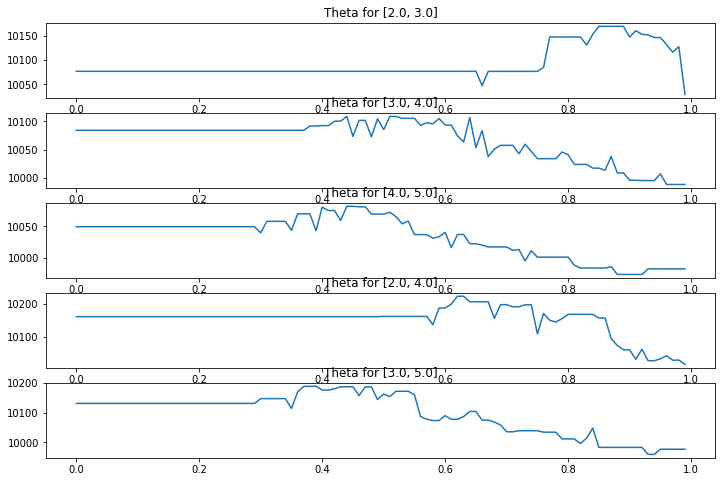

In [108]:
start = 0
end = 1
step = 0.01
fig,ax = plt.subplots(5,1,figsize = (12,8))
theta = np.zeros(5)

for time,res,i in zip(coint_time,result_AR,range(len(coint_time))):
    w,alpha,_,_,ar_res_coint,ar_res_EMA = res
    Coint_res_vec = SampleB[time].dot(w)
    EMA_res_vec = Coint_res_vec-Coint_res_vec.ewm(span=alpha).mean()
    dollar = Grid_Search(Coint_res_vec,EMA_res_vec,ar_res_coint,ar_res_EMA,start=0,end=1,step=0.01)
    theta[i] = np.argmax(dollar)/100.
    print("theta for",time,"is ",np.argmax(dollar)/100.,"max dollar is",max(dollar))
    ax[i].plot(np.arange(start,end,step),dollar)
    ax[i].set_title("Theta for {}".format(time))

In [109]:
#calculate for SampleC
for time,res,theta_,i in zip(coint_time,result_AR,theta,range(len(coint_time))):
    w,alpha,_,_,ar_res_coint,ar_res_EMA = res
    Coint_res_vec = SampleC[time].dot(w)
    EMA_res_vec = Coint_res_vec-Coint_res_vec.ewm(span=alpha).mean()
    dollar = calulate_return(theta_,Coint_res_vec,EMA_res_vec,ar_res_coint,ar_res_EMA)[0]
    print(time,dollar)

[2.0, 3.0] 10010.57133886823
[3.0, 4.0] 10005.759370928088
[4.0, 5.0] 10013.35205398695
[2.0, 4.0] 10015.697801389832
[3.0, 5.0] 10028.853944638773


In [110]:
#5 calculate the signal quality metrics
def cal_basic_statistics(pnl):
    #hit ratio
    hit_ratio=float(sum(pnl[i]>0 for i in range(len(pnl))))/len(pnl)
    #number of winning week and month
    number_wining=[]
    number_wining.append(float(sum(np.sum(pnl[i:i+5])>0 for i in range(len(pnl)-5) if i%5==0))/(len(pnl)/5))
    number_wining.append(float(sum(np.sum(pnl[i:i+22])>0 for i in range(len(pnl)-22) if i%22==0))/(len(pnl)/22))
    average_profit=np.mean([pnl[i] for i in range(len(pnl)) if pnl[i]>0])
    average_loss=np.mean([pnl[i] for i in range(len(pnl)) if pnl[i]<0])
    
    return hit_ratio,number_wining,average_profit,average_loss
                  
def calculate_signal_quaility(theta,data1,data2,AR_1,AR_2):
    H =5
    position = 0 #1 for buy,0 for zero,-1 for sell
    count = 0  #if you hold positions, you should not open new ones
    correct_sig = 0
    count_sig = 0
    dollar = 10000
    forecast = np.zeros(data1.shape[0]-H)
    realized = data1.iloc[H:]
    for index in range(data1.shape[0]-H):
        diff = Expected_Gain(theta,data1,data2,AR_1,AR_2,data1.index[index])
        forecast[index] = diff+data1.iloc[index+H]
        if diff>0.001 and position==0:  #0.1 basis point 
            count_sig+=1
            dollar += dollar*(data1.iloc[index+H]-data1.iloc[index])/100
            if data1.iloc[index+H]-data1.iloc[index]>0:
                correct_sig+=1
            position=1
        elif diff<-0.001 and position==0:
            count_sig+=1
            if data1.iloc[index+H]-data1.iloc[index]<0:
                correct_sig+=1
            dollar -=dollar*(data1.iloc[index+H]-data1.iloc[index])/100
            position=-1
        elif position==1 or position==-1:
            if count==5: #hold for five days
                position=0
                count = 0
            else:
                count+=1
    return dollar,realized,forecast,float(correct_sig)/count_sig

hit ratio : 0.45867768595041325
number of winning(week and month) : [0.47520661157024796, 0.45454545454545453]
average profit : 9.186387687546174e-05
average loss : -8.307937626774237e-05
[2.0, 3.0] correct ratio 0.4444444444444444


hit ratio : 0.45454545454545453
number of winning(week and month) : [0.6198347107438017, 0.5454545454545454]
average profit : 6.777549451201094e-05
average loss : -6.197029540171775e-05
[3.0, 4.0] correct ratio 0.6388888888888888


hit ratio : 0.44214876033057854
number of winning(week and month) : [0.47520661157024796, 0.45454545454545453]
average profit : 8.194680589197333e-05
average loss : -6.520029312143908e-05
[4.0, 5.0] correct ratio 0.4722222222222222


hit ratio : 0.43388429752066116
number of winning(week and month) : [0.578512396694215, 0.5454545454545454]
average profit : 0.00014802200010597161
average loss : -0.00012043181883045515
[2.0, 4.0] correct ratio 0.5


hit ratio : 0.43388429752066116
number of winning(week and month) : [0.53719008264

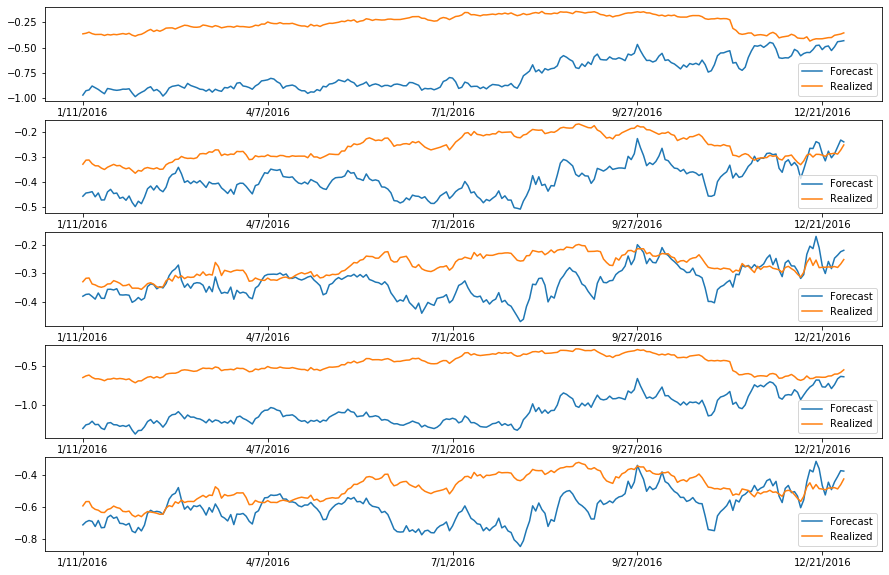

In [160]:
dollar,realized,forecast,corr_ratio = calculate_signal_quaility(theta_,Coint_res_vec,EMA_res_vec,ar_res_coint,ar_res_EMA)
fig,ax = plt.subplots(5,figsize=(15,10))
basic_str=["hit ratio","number of winning(week and month)","average profit","average loss"]

for time,res,theta_,i in zip(coint_time,result_AR,theta,range(len(coint_time))):
    w,alpha,_,_,ar_res_coint,ar_res_EMA = res
    Coint_res_vec = SampleC[time].dot(w)
    EMA_res_vec = Coint_res_vec-Coint_res_vec.ewm(span=alpha).mean()
    pnl = calulate_return(theta_,Coint_res_vec,EMA_res_vec,ar_res_coint,ar_res_EMA)[1]
    basic_stats=cal_basic_statistics((pnl[1:]-pnl[:-1])/pnl[:-1])
    for stat_str,stats_num in zip(basic_str,basic_stats):
        print(stat_str,":",stats_num)
    
    dollar,realized,forecast,corr_ratio= calculate_signal_quaility(theta_,Coint_res_vec,EMA_res_vec,ar_res_coint,ar_res_EMA)
    forecast = pd.Series(forecast,index = realized.index)
    ax[i].xaxis.set_major_locator(ticker.MaxNLocator(5))
    ax[i].plot(forecast)
    ax[i].plot(realized)
    ax[i].legend(['Forecast',"Realized"],loc='lower right')
    print(time,"correct ratio",corr_ratio)
    print("\n")
    

# Conclusion

The result is not promising.

I think it is because when we estimate the theta, it will create the overfitting and it causes the result to be bad.

Further Improvement:

Make theta a time varying variable,
Compute dynamic AR model,
Use more signal metrics